In [442]:
import numpy as np
from tqdm import tqdm
import scipy.signal as signal #signal processing stuff (e.g. filters, hilbert transform, etc.)
import scipy
import struct
import av
from skimage.measure import label, regionprops, find_contours
import os
import cv2
import imageio
import skimage.measure
import skimage.feature
import math
import operator
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd
import matplotlib as mpl
from moviepy.video.io.bindings import mplfig_to_npimage
from matplotlib.colors import LinearSegmentedColormap

In [111]:
import nelpy as nel
import nelpy.plotting as npl
#Shay's plot settings
%matplotlib inline
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Cd Std', font_scale=2, palette='deep', style='white',\
         rc=({'figure.figsize': (6, 3), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':20, 'legend.fontsize': 20, 'ytick.labelsize': 20, 'xtick.labelsize': 20}))

In [42]:
reader = imageio.read("/Kings/Kings_Wireless_Stim OFF_Res.mp4")
reader.get_meta_data()

{'duration': 60.68,
 'ffmpeg_version': '2.2.4 built on May  6 2015 11:26:10 with gcc 4.9.1 (Ubuntu 4.9.1-16ubuntu6)',
 'fps': 25.0,
 'nframes': 1517,
 'plugin': 'ffmpeg',
 'size': (1280, 720),
 'source_size': (1280, 720)}

In [43]:
filename = '/Kings/Kings_Wireless_Stim_OFF_ResDeepCut_resnet50_wirelessStimJun13shuffle1_40000.h5'
pd.read_hdf(filename)

scorer    DeepCut_resnet50_wirelessStimJun13shuffle1_40000              \
bodyparts                                         RightEar               
coords                                                   x           y   
0                                               751.573169  246.896356   
1                                               734.390432  249.252714   
2                                               725.819519  249.530274   
3                                               707.490622  257.619997   
4                                               693.029021  258.380444   
5                                               685.177570  258.265228   
6                                               674.733912  265.055130   
7                                               668.208353  273.849220   
8                                               661.570806  284.220663   
9                                               652.310466  297.140344   
10                                              641.356140  307.403199   
11                                              625.248257  315.982792   
12                                              611.087410  325.395569   
13                                              592.981571  339.221361   
14                                              586.544490  344.386237   
15                                              588.111972  351.718194   
16                                              598.795723  371.186503   
17                                              603.368688  380.955010   
18                                              602.936035  393.927759   
19                                              594.493276  408.019835   
20                                              586.953366  411.423554   
21                                              576.511342  408.074106   
22                                              566.192216  403.852949   
23                                              541.102149  408.566431   
24                                              530.642846  408.803075   
25                                              525.778637  413.638910   
26                                              521.318026  428.084223   
27                                              521.704470  442.017706   
28                                              523.608510  457.945901   
29                                              529.976073  480.673445   
...                                                    ...         ...   
1487                                            841.978691  242.462003   
1488                                            836.020093  235.610079   
1489                                            823.851495  224.814733   
1490                                            819.074692  225.657366   
1491                                            812.660055  223.999131   
1492                                            801.825690  219.660187   
1493                                            787.412148  216.888967   
1494                                            776.655900  214.352426   
1495                                            766.448821  210.011212   
1496                                            735.162406  212.557512   
1497                                            719.839869  215.747318   
1498                                            705.671072  218.489982   
1499                                            689.383775  217.734418   
1500                                            680.632198  217.636601   
1501                                            670.323464  217.532723   
1502                                            660.914790  219.359738   
1503                                            652.543415  219.146808   
1504                                            644.995038  216.145041   
1505                                            636.035593  212.921378   
1506                                            611.949672  213.752340   
1507

In [44]:
data = pd.read_hdf(filename)
headcoords_off = data.get_values()[:,9:11]
headcoords_off[1515,0:2]

array([ 554.87915325,  195.84476186])

In [45]:
filename = '/Kings/Kings_Wireless_Stim_ON_ResDeepCut_resnet50_wirelessStimJun13shuffle1_40000.h5'
pd.read_hdf(filename)

scorer    DeepCut_resnet50_wirelessStimJun13shuffle1_40000              \
bodyparts                                         RightEar               
coords                                                   x           y   
0                                               478.830941  495.769932   
1                                               478.809547  495.599837   
2                                               478.640314  495.548042   
3                                               478.610781  495.474738   
4                                               478.789440  495.774445   
5                                               479.187174  495.607913   
6                                               478.723095  494.322836   
7                                               479.326624  492.779186   
8                                               483.329134  493.865829   
9                                               490.614183  498.696608   
10                                              502.870853  497.921812   
11                                              518.100426  499.058263   
12                                              538.089505  496.944485   
13                                              560.812789  494.114625   
14                                              585.172472  486.215660   
15                                              607.781739  474.918563   
16                                              630.088173  466.744442   
17                                              643.044819  465.441317   
18                                              655.058014  463.842110   
19                                              672.437190  461.003187   
20                                              674.979622  459.608680   
21                                              677.055949  458.216369   
22                                              679.194112  455.501747   
23                                              682.741716  455.014162   
24                                              687.055893  453.045798   
25                                              689.005129  454.562628   
26                                              693.633448  461.828571   
27                                              692.710505  466.373579   
28                                              694.820430  469.540250   
29                                              694.114326  476.788739   
...                                                    ...         ...   
1495                                            595.555115  228.462782   
1496                                            591.227061  223.569511   
1497                                            588.827128  222.739875   
1498                                            583.992262  217.250560   
1499                                            572.921992  219.914970   
1500                                            568.947043  223.078347   
1501                                            567.918250  225.799325   
1502                                            557.666890  230.228537   
1503                                            549.972353  234.218973   
1504                                            540.813551  245.301104   
1505                                            529.168517  260.729597   
1506                                            520.351024  274.284952   
1507                                            509.733554  286.437887   
1508                                            501.201912  298.368667   
1509                                            489.142909  326.511897   
1510                                            482.110181  333.927017   
1511                                            475.671056  338.065288   
1512                                            474.636587  348.831741   
1513                                            474.417328  354.875646   
1514                                            478.300860  360.155104   
1515

In [46]:
data = pd.read_hdf(filename)
headcoords_on = data.get_values()[:,9:11]
headcoords_on[1515,0:2]

array([ 481.73822021,  320.16897488])

(['galloway',
  'gelbvieh',
  'shorthorn',
  'hereford',
  'texas_longhorn',
  'jersey',
  'charolais',
  'brown_swiss',
  'holstein',
  'angus',
  'texas_aggie'],
 <bound method ColorGroup.plot of <ColorGroup at 0x7fed198ac5c0 with 11 colors>>)

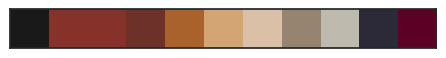

In [47]:
npl.colors.cows.color_names,npl.colors.cows.plot

(400.0, 1000.0, 100.0, 700.0)

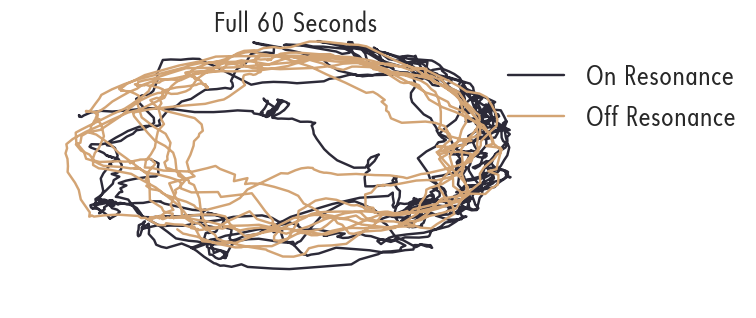

In [48]:
plt.figure()
plt.plot(headcoords_on[:,0],headcoords_on[:,1],color =npl.colors.cows.angus,label="On Resonance")
plt.plot(headcoords_off[:,0],headcoords_off[:,1],color=npl.colors.cows.jersey,label="Off Resonance",alpha=1)
plt.legend(bbox_to_anchor=(1.5,1))
plt.title("Full 60 Seconds")
plt.axis("off")

# Play with time threshold

In [49]:
seconds = 30
fps = reader.get_meta_data()['fps']
fps

25.0

(400.0, 1000.0, 100.0, 700.0)

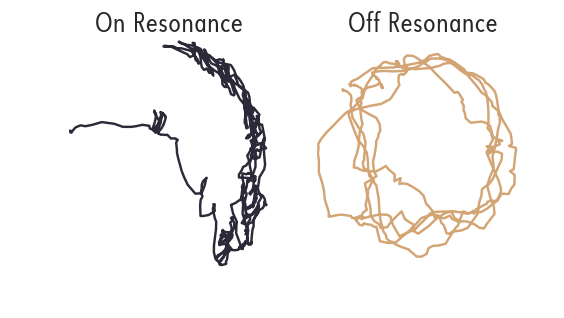

In [50]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(headcoords_on[0:int(seconds*fps),0],headcoords_on[0:int(seconds*fps),1],color =npl.colors.cows.angus,label="On Resonance")
plt.axis("off")
plt.title("On Resonance")
# plt.legend(bbox_to_anchor=(1.5,1))
plt.subplot(1,2,2)
plt.plot(headcoords_off[0:int(seconds*fps),0],headcoords_off[0:int(seconds*fps),1],color=npl.colors.cows.jersey,label="Off Resonance",alpha=1)
# plt.legend(bbox_to_anchor=(1.5,1))
plt.title("Off Resonance")
# plt.text(1000,400,"Ariel did all the analysis")
plt.axis("off")

In [445]:
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
# For use of "viscm view"
test_cm = parula_map

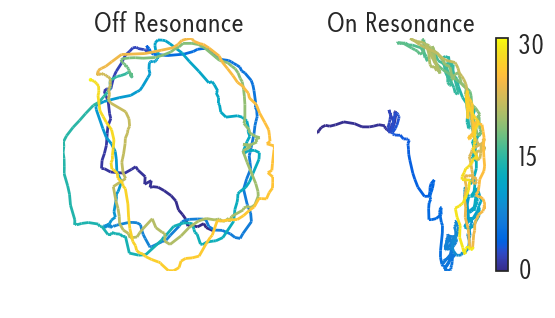

In [446]:
x= headcoords_off[0:int(seconds*fps),0]
y= headcoords_off[0:int(seconds*fps),1]

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, int(fps*seconds)-1)
lc = LineCollection(segments, cmap=parula_map, norm=norm)

# Set the values used for colormapping
lc.set_array(np.arange(0, (fps*seconds)-1, 1))
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
axs[0].set_title("Off Resonance")

# fig.colorbar(line, ax=axs[0])
axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(y.min(), y.max())
axs[0].axis("off")

x1= headcoords_on[0:int(seconds*fps),0]
y1= headcoords_on[0:int(seconds*fps),1]
points1 = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments1 = np.concatenate([points1[:-1], points1[1:]], axis=1)

# Use a boundary norm instead
norm1 = plt.Normalize(0, seconds+1)
lc1 = LineCollection(segments1, cmap=parula_map, norm=norm1)

# Set the values used for colormapping
lc1.set_array(np.linspace(0, seconds, (fps*seconds)-1))
lc1.set_linewidth(2)
line1 = axs[1].add_collection(lc1)
axs[1].set_title("On Resonance")
fig.colorbar(line1, ax=axs[1],ticks=range(0,31,15))
axs[1].set_xlim(x1.min(), x1.max())
axs[1].set_ylim(y1.min(), y1.max())
axs[1].axis("off")
plt.show()

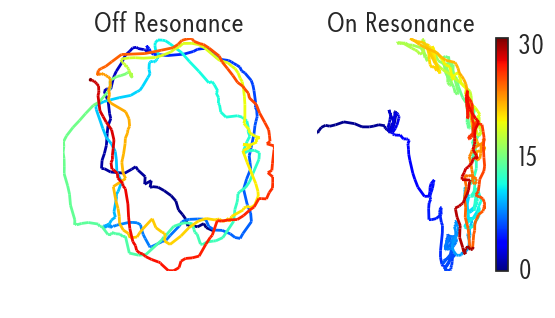

In [453]:
x= headcoords_off[0:int(seconds*fps),0]
y= headcoords_off[0:int(seconds*fps),1]

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(0, int(fps*seconds)-1)
lc = LineCollection(segments, cmap='jet', norm=norm)

# Set the values used for colormapping
lc.set_array(np.arange(0, (fps*seconds)-1, 1))
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
axs[0].set_title("Off Resonance")

# fig.colorbar(line, ax=axs[0])
axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(y.min(), y.max())
axs[0].axis("off")

x1= headcoords_on[0:int(seconds*fps),0]
y1= headcoords_on[0:int(seconds*fps),1]
points1 = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments1 = np.concatenate([points1[:-1], points1[1:]], axis=1)

# Use a boundary norm instead
norm1 = plt.Normalize(0, seconds+1)
lc1 = LineCollection(segments1, cmap='jet', norm=norm1)

# Set the values used for colormapping
lc1.set_array(np.linspace(0, seconds, (fps*seconds)-1))
lc1.set_linewidth(2)
line1 = axs[1].add_collection(lc1)
axs[1].set_title("On Resonance")
fig.colorbar(line1, ax=axs[1],ticks=range(0,31,15))
axs[1].set_xlim(x1.min(), x1.max())
axs[1].set_ylim(y1.min(), y1.max())
axs[1].axis("off")
plt.show()

# Now to play with the video, since we're extra...

## On Resonance

In [433]:
1280/72

17.77777777777778

In [ ]:
filename='/Kings/Kings_Wireless_Stim_ON_Res.mp4'
reader = imageio.get_reader(filename)

for i, im in tqdm(enumerate(reader)):    
    if i > 0:
        if i > (seconds*fps):
            break
        ax = plt.gca()
        
        fig = plt.gcf()
        DPI = fig.get_dpi()
        fig.set_size_inches(1280.0/float(DPI),720.0/float(DPI))
        ax.clear()
        ax.imshow(im)
        ax.scatter(headcoords_on[i,0],headcoords_on[i,1],color='white',s=30)
        norm1 = plt.Normalize(0, (i/fps))
        lc1 = LineCollection(segments1[:i], cmap='bone', norm=norm1)
        # Set the values used for colormapping
        lc1.set_array(np.linspace(0, (i/fps), i))
        lc1.set_linewidth(2)
        line1 = ax.add_collection(lc1)
        ax.set_xlim(0, 1280)
        ax.set_ylim(0, 720)
        ax.axis("off")
        plt.savefig("/Kings/on_res/%04d.png"%i,transparent=True)
    else:
        ax = plt.gca()
        
        fig = plt.gcf()
        DPI = fig.get_dpi()
        fig.set_size_inches(1280.0/float(DPI),720.0/float(DPI))
        ax.clear()
        ax.imshow(im)
        ax.scatter(headcoords_on[i,0],headcoords_on[i,1],color='white',s=30)
        ax.set_xlim(0, 1280)
        ax.set_ylim(0, 720)
        ax.axis("off")
        plt.tight_layout()
        plt.savefig("/Kings/on_res/%04d.png"%i,transparent=True,)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()

## Off Resonance

In [ ]:
filename='/Kings/Kings_Wireless_Stim OFF_Res.mp4'
reader = imageio.get_reader(filename)

for i, im in tqdm(enumerate(reader)):    
    if i > 0:
        if i > (seconds*fps):
            break
        ax = plt.gca()
        
        fig = plt.gcf()
        DPI = fig.get_dpi()
        fig.set_size_inches(1280.0/float(DPI),720.0/float(DPI))
        ax.clear()
        ax.imshow(im)
        ax.scatter(headcoords_off[i,0],headcoords_off[i,1],color='white',s=30)
        norm1 = plt.Normalize(0, (i/fps))
        lc1 = LineCollection(segments[:i], cmap='bone', norm=norm1)
        # Set the values used for colormapping
        lc1.set_array(np.linspace(0, (i/fps), i))
        lc1.set_linewidth(2)
        line1 = ax.add_collection(lc1)
        ax.set_xlim(0, 1280)
        ax.set_ylim(0, 720)
        ax.axis("off")
        plt.savefig("/Kings/off_res/%04d.png"%i,transparent=True)
    else:
        ax = plt.gca()
        
        fig = plt.gcf()
        DPI = fig.get_dpi()
        fig.set_size_inches(1280.0/float(DPI),720.0/float(DPI))
        ax.clear()
        ax.imshow(im)
        ax.scatter(headcoords_off[i,0],headcoords_off[i,1],color='white',s=30)
        ax.set_xlim(0, 1280)
        ax.set_ylim(0, 720)
        ax.axis("off")
        plt.tight_layout()
        plt.savefig("/Kings/off_res/%04d.png"%i,transparent=True,)
    k = cv2.waitKey(1) & 0xff
    if k == 27:
        break

cv2.destroyAllWindows()